In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
!pip install hmmlearn
from hmmlearn import hmm
from hmmlearn import hmm
import seaborn as sns  
import tensorflow as tf 
from keras.layers import Input, Dense, BatchNormalization 
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Layer,Dropout  
from keras.layers.merge import concatenate  
from keras.models import Sequential, Model  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.utils import to_categorical  
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BD = pd.read_csv('/content/drive/MyDrive/UniversalBank.csv',delimiter=',')
print(BD)

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0            

In [ ]:
Bank=BD.drop(['ID', 'ZIP Code'],axis=1)
print(Bank)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0    

In [ ]:
print(Bank.isnull().sum())

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [ ]:
BD  = Bank.copy()
BD = pd.get_dummies(Bank,columns = ['Education'])
display(BD.head())

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [ ]:
Pos = BD.pop("Personal Loan")
BD.insert(13, "Personal Loan", Pos)
print(BD)

      Age  Experience  Income  Family  CCAvg  Mortgage  Securities Account  \
0      25           1      49       4    1.6         0                   1   
1      45          19      34       3    1.5         0                   1   
2      39          15      11       1    1.0         0                   0   
3      35           9     100       1    2.7         0                   0   
4      35           8      45       4    1.0         0                   0   
...   ...         ...     ...     ...    ...       ...                 ...   
4995   29           3      40       1    1.9         0                   0   
4996   30           4      15       4    0.4        85                   0   
4997   63          39      24       2    0.3         0                   0   
4998   65          40      49       3    0.5         0                   0   
4999   28           4      83       3    0.8         0                   0   

      CD Account  Online  CreditCard  Education_1  Education_2 

In [ ]:
X = BD.drop("Personal Loan", axis=1)
X = X.values 
y = BD["Personal Loan"]
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.4, random_state=1)

In [ ]:
from sklearn import preprocessing
import numpy as np
x_array = np.array([40,10,84,2,2,0,0,0,1,1,0,1,0])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.42720319 0.1068008  0.8971267  0.02136016 0.02136016 0.
  0.         0.         0.01068008 0.01068008 0.         0.01068008
  0.        ]]


In [ ]:
data = np.array([40,10,84,2,2,0,0,0,1,1,0,1,0])

In [ ]:
distance = np.linalg.norm(X - data, axis=1)

In [ ]:
k = 35
nearest_ids = distance.argsort()[:k]
nearest_ids

array([ 700, 2827, 4926, 3393, 2786, 4615, 2086, 4771, 2640, 2301, 4624,
       4335,  123, 2306,  766, 1976, 4034,  487, 4296, 3756, 3272,  416,
       1401, 3152, 4495, 4487,  542, 4588, 4202,  529, 1598, 1416, 3211,
        738, 1526])

In [ ]:
nearestPersonal_Loan = y[nearest_ids]
nearestPersonal_Loan

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
predict = nearest_neighbor_Personal_Loan.mean()
predict

0.0

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=35)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=35)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
results = []
for k in range(1, 36):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1    0.9000
1    2    0.9065
2    3    0.9040
3    4    0.9075
4    5    0.9055
5    6    0.9050
6    7    0.9045
7    8    0.9045
8    9    0.9090
9   10    0.9045
10  11    0.9030
11  12    0.9070
12  13    0.9065
13  14    0.9060
14  15    0.9040
15  16    0.9045
16  17    0.9060
17  18    0.9055
18  19    0.9070
19  20    0.9045
20  21    0.9045
21  22    0.9085
22  23    0.9070
23  24    0.9115
24  25    0.9110
25  26    0.9110
26  27    0.9115
27  28    0.9125
28  29    0.9125
29  30    0.9095
30  31    0.9120
31  32    0.9080
32  33    0.9080
33  34    0.9045
34  35    0.9065


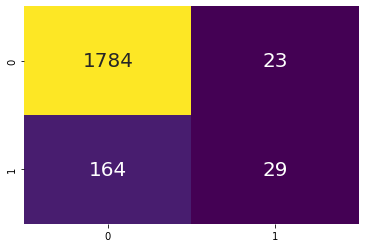

In [ ]:
from sklearn.metrics import confusion_matrix
clf=KNeighborsClassifier(n_neighbors=35)
clf.fit(X_train,y_train)
predicted_value=clf.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cbar=False,fmt='g',cmap="viridis")
plt.show()

In [ ]:
train_df, temp_df = train_test_split(BD, test_size=0.5, random_state=1)
valid_df, test_df = train_test_split(temp_df, test_size=0.4, random_state=1)
print('Training dataset', train_df.shape)
print('Validation dataset', valid_df.shape)
print('Test dataset', test_df.shape)

Training dataset (2500, 14)
Validation dataset (1500, 14)
Test dataset (1000, 14)


In [ ]:
from sklearn import preprocessing
outcome = 'Personal Loan'
predictors = list(BD.columns)
predictors.remove(outcome)
Scaler = preprocessing.StandardScaler()
Scaler.fit(train_df[predictors])
train_x = Scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_x = Scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]
test_x = Scaler.transform(test_df[predictors])
test_y = test_df[outcome]

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=35)
classifier.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=35)

In [ ]:
knnPred = classifier.predict(train_x)
print(confusion_matrix(train_y, knnPred))
print('Accuracy:--', accuracy_score(train_y, knnPredOpt))

[[2257    2]
 [ 141  100]]
Accuracy:-- 0.9428


In [ ]:
knnPred = classifier.predict(valid_x)
print(confusion_matrix(valid_y, knnPred))
print('Accuracy--', accuracy_score(valid_y, knnPred))

[[1346    3]
 [ 105   46]]
Accuracy-- 0.928


In [ ]:
knnPred = classifier.predict(test_x)
print(confusion_matrix(test_y, knnPred))
print('Accuracy--', accuracy_score(test_y, knnPred))

[[908   4]
 [ 57  31]]
Accuracy-- 0.939
